### Comprehending Customer Requirements

A Customer Relationship Management (CRM) system effectively tackles customer challenges by facilitating better communication, optimizing processes, and increasing overall customer satisfaction.

Consolidates customer interactions, preferences, and historical issues within a unified system.  
Offers valuable insights into customer behavior, enabling businesses to tailor their strategies effectively.

 1. Minimizing Response Duration 
Streamlines customer support processes through automation, guaranteeing prompt replies.  
Delivers a comprehensive view of customer history, eliminating the need for agents to request the same information multiple times.


 2. Boosting Customer Interaction
Dispatches automated follow-ups and customized messages to foster ongoing relationships.  
Employs AI-driven analytics to foresee customer needs and provide proactive solutions. 


 3. Enhancing Issue Resolution 
Monitors and categorizes customer complaints, facilitating quicker and more effective resolutions.  
Allocates cases to appropriate team members to prevent misunderstandings and delays.  


 4. Optimizing Sales and Marketing
Recognizes high-value customers and categorizes them for focused marketing efforts.  
Automates the nurturing of leads, ensuring that prospective customers receive pertinent information.  


 5. Delivering Data-Driven Insights</b>  
Produces reports on customer interactions, assisting businesses in recognizing trends and refining strategies.  
Utilizes predictive analytics to foresee customer attrition and implement preventive measures.


### Machine Learning Approach
##### Analyze Customer Data
1. CRM Analytics: Use CRM data to track complaints, queries, and unresolved issues.
   
   Customer Journey Mapping: Identify friction points by analyzing interactions across touchpoints (website, app, support, etc.).
   RFM Analysis: To detect engagement drops, and understand customer behavior using Recency, Frequency, and Monetary (RFM) metrics.
   
2. Monitor Customer Feedback
Surveys & NPS (Net Promoter Score): Use structured surveys to gauge customer satisfaction and detect common complaints.
Social Media Listening: Analyze mentions, comments, and reviews on platforms like Twitter, Facebook, and LinkedIn.
Customer Support Logs: Identify recurring issues from chat logs, call transcripts, and email complaints.
3. Use Predictive Analytics & AI
Sentiment Analysis: AI models can analyze customer emotions from text, social media, or chat interactions.
Churn Prediction Models: Machine learning models detect customers likely to stop using your product due to dissatisfaction.
Anomaly Detection: Track unexpected changes in customer behavior, such as sudden drop-offs in engagement or spending.
4. Competitor Benchmarking
Compare Industry Standards: Look at how competitors handle common pain points.
Review Competitor Feedback: Analyze negative reviews of competitors to learn what frustrates customers in your market.
5. Identify Trends & Patterns
Heatmaps & Session Replays: Analyze website visitor behavior to identify confusing or frustrating elements.
Support Ticket Categorization: Cluster similar complaints to detect underlying trends.
Seasonal Trends: Check for recurring issues that spike during specific times (e.g., high refund requests after sales).


### Predict for Anticipating Customer Pain Points   
Import and Sanitize Customer Data   
Conduct Exploratory Data Analysis (EDA)   
Analyze Sentiment in Customer Feedback   
Detect Recurring Issues through Natural Language Processing (NLP )  
Forecast Pain Points Utilizing Machine Learning Techniques.

In [2]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from textblob import TextBlob
from wordcloud import WordCloud


### Created a sample csv fie for the feedback

In [3]:
# Read CSV and force pandas to split properly
df = pd.read_csv("customer_feedback.csv", sep=",", encoding="utf-8")

# Split first row into actual column names
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split(",", expand=True)
    df.columns = ['customer_id', 'feedback', 'complaint_type', 'purchase_history']

print("Fixed Columns:", df.columns.tolist())

# Verify output
print(df.head())  


Fixed Columns: ['customer_id', 'feedback', 'complaint_type', 'purchase_history']
  customer_id                                           feedback  \
0         101          The product stopped working within a week   
1         102  The delivery was late by 3 days no update was ...   
2         103            Customer support was unhelpful and rude   
3         104           The app crashes frequently please fix it   
4         105                 Received a wrong item unacceptable   

     complaint_type purchase_history  
0    Product Defect                5  
1     Late Delivery                2  
2  Customer Service                3  
3   Technical Issue                4  
4     Wrong Product                2  


### Customers sentiment analysis

In [5]:
from textblob import TextBlob

df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'negative' if x < -0.1 else 'neutral' if x < 0.1 else 'positive')

print(df[['feedback', 'sentiment', 'sentiment_label']])


                                            feedback  sentiment  \
0          The product stopped working within a week     0.0000   
1  The delivery was late by 3 days no update was ...    -0.3000   
2            Customer support was unhelpful and rude    -0.3000   
3           The app crashes frequently please fix it     0.1000   
4                 Received a wrong item unacceptable    -0.5000   
5  The website is too slow and difficult to navigate    -0.4000   
6     I was charged twice for my order need a refund     0.0000   
7       The quality is not as advertised looks cheap     0.4000   
8             Support team takes too long to respond    -0.0500   
9  The payment process is confusing and not user ...     0.0375   

  sentiment_label  
0         neutral  
1        negative  
2        negative  
3        positive  
4        negative  
5        negative  
6         neutral  
7        positive  
8         neutral  
9         neutral  


# Data Cleaning
df.dropna(subset=['feedback'], inplace=True)  # Remove missing feedback
#df['feedback'] = df['feedback'].str.lower()  # Convert text to lowercase

In [21]:
df.columns = df.columns.str.strip()

print("Fixed Columns:", df.columns)



Fixed Columns: Index(['customer_id', 'feedback', 'complaint_type', 'purchase_history',
       'sentiment', 'sentiment_label'],
      dtype='object')


In [22]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Check again for columns
print(df.columns) 


Index(['customer_id', 'feedback', 'complaint_type', 'purchase_history',
       'sentiment', 'sentiment_label'],
      dtype='object')


!pip install --upgrade numpy threadpoolctl


In [23]:
from textblob import TextBlob

# Apply Sentiment Analysis
df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'negative' if x < -0.1 else 'neutral' if x < 0.1 else 'positive')

print(df[['feedback', 'sentiment', 'sentiment_label']])


                                            feedback  sentiment  \
0          The product stopped working within a week     0.0000   
1  The delivery was late by 3 days no update was ...    -0.3000   
2            Customer support was unhelpful and rude    -0.3000   
3           The app crashes frequently please fix it     0.1000   
4                 Received a wrong item unacceptable    -0.5000   
5  The website is too slow and difficult to navigate    -0.4000   
6     I was charged twice for my order need a refund     0.0000   
7       The quality is not as advertised looks cheap     0.4000   
8             Support team takes too long to respond    -0.0500   
9  The payment process is confusing and not user ...     0.0375   

  sentiment_label  
0         neutral  
1        negative  
2        negative  
3        positive  
4        negative  
5        negative  
6         neutral  
7        positive  
8         neutral  
9         neutral  


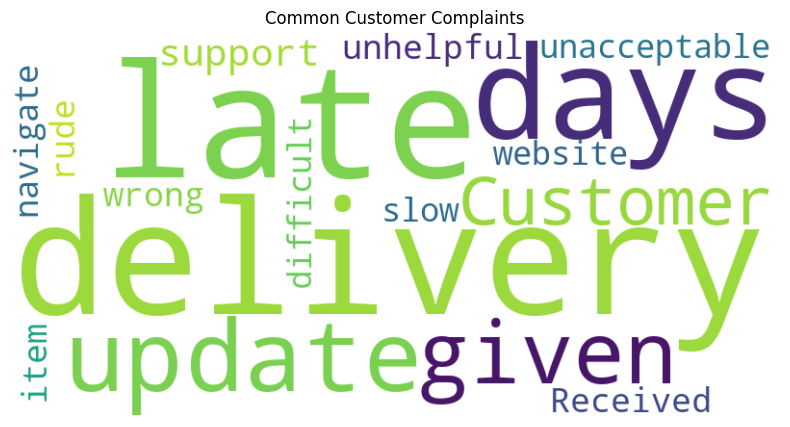

In [24]:
# Identify Common Customer Complaints using NLP (WordCloud)
negative_feedback = " ".join(df[df['sentiment_label'] == 'negative']['feedback'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_feedback)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Customer Complaints")
plt.show()

### Cluster Common Complaint Categories using K-Means

In [26]:
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df[df['sentiment_label'] == 'negative']['feedback'])

from sklearn.cluster import KMeans

# Ensuring n_clusters do not exceed the number of samples
n_samples = len(df)
n_clusters = min(3, n_samples)  

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['sentiment']])

print(df[['feedback', 'sentiment', 'cluster']])



C:\Users\Sarmita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                            feedback  sentiment  cluster
0          The product stopped working within a week     0.0000        0
1  The delivery was late by 3 days no update was ...    -0.3000        1
2            Customer support was unhelpful and rude    -0.3000        1
3           The app crashes frequently please fix it     0.1000        0
4                 Received a wrong item unacceptable    -0.5000        1
5  The website is too slow and difficult to navigate    -0.4000        1
6     I was charged twice for my order need a refund     0.0000        0
7       The quality is not as advertised looks cheap     0.4000        2
8             Support team takes too long to respond    -0.0500        0
9  The payment process is confusing and not user ...     0.0375        0


C:\Users\Sarmita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


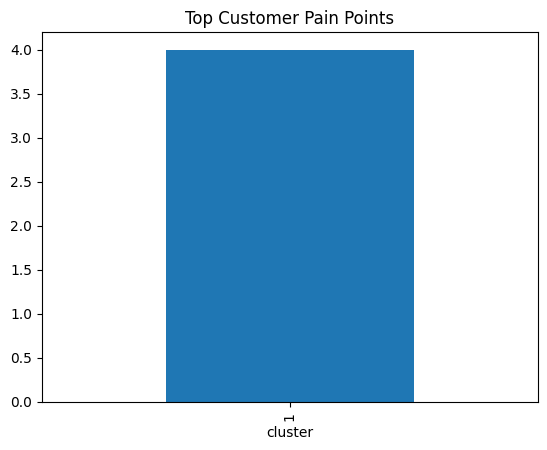

In [28]:
# Analyze & Visualize Key Pain Points
complaint_summary = df[df['sentiment_label'] == 'negative'].groupby('cluster').size()
complaint_summary.plot(kind='bar', title="Top Customer Pain Points")
plt.show()

### Predict Future Pain Points Based on Past Patterns 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create Features & Labels & Encode complaint type
df['complaint_type'] = df['complaint_type'].astype('category').cat.codes  
X = df[['complaint_type']]

# Binary classification
y = df['sentiment_label'].map({'negative': 1, 'neutral': 0, 'positive': 0})  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Potential Future Complaints
df['predicted_issue'] = model.predict(X)
df[['customer_id', 'predicted_issue']].head()


,customer_id,predicted_issue
0,101,0
1,102,1
2,103,1
3,104,0
4,105,1


### Conclusion: 
To effectively tackle customer pain points, it is essential to utilize CRM data for monitoring inquiries, complaints, and unresolved issues. Gaining a comprehensive understanding of the customer journey by mapping interactions across various platforms, including the website, mobile application, and customer support channels, yields valuable insights into their overall experience. Employing RFM (Recency, Frequency, Monetary) metrics is instrumental in assessing customer engagement, allowing businesses to identify and cultivate relationships with high-value customers. Moreover, systematic survey monitoring, analysis of customer support logs, and tracking social media feedback provide deeper insights into customer satisfaction and highlight areas for improvement.

Advanced analytical methods such as Sentiment Analysis, Churn Prediction, and Anomaly Detection are vital for recognizing unexpected behavioral shifts that may signal dissatisfaction or the risk of customer churn. Comparing performance against industry benchmarks and examining competitors' strategies can offer strategic insights for enhancing the customer experience. Additionally, the use of heatmaps to analyze website interactions reveals trends and patterns, enabling businesses to refine their digital presence and improve user engagement.